In [9]:
import os
import matplotlib.pyplot as plt
import glob
import pickle
from keras.utils import to_categorical

from pkl_reader import *
from lstm_impl import CombinedLSTM

In [10]:
# The function to extract training data from snippets pickles
def extract_data(pklfile, full_traj=False):
    with open(pklfile, 'rb') as f:
        dataset_all = pickle.load(f)
        
    # All the history trajectoreis (x, y, heading), with shape (batch_size, sequence_length, feature_dims)
    history_traj_data = np.array(dataset_all['features'])[:, :, :3]

    # All the future trajectoreis (x, y), with shape (batch_size, sequence_length, feature_dims)
    future_traj_data = np.array(dataset_all['labels'])[:, :, :2]

    # All the goal positins and occupancy (x, y, occup), with shape (batch_size, (goal_nums * feature_dims))
    goals_position = np.array(dataset_all['goals'])
    goals_position = goals_position.reshape((goals_position.shape[0], goals_position.shape[1] * goals_position.shape[2]))

    # All intention labels, with shape (batch_size, goal_nums)
    goal_idx = np.array(dataset_all['labels'])[:, 0, -1]
    # Convert to one-hot and the last one is undecided (-1)
    one_hot_goal = to_categorical(goal_idx, num_classes=33)
    
    if full_traj:
        traj_idx = np.array(dataset_all['traj_idx'])
        return history_traj_data, future_traj_data, goals_position, one_hot_goal, traj_idx
    else:  
        return history_traj_data, future_traj_data, goals_position, one_hot_goal

In [11]:
# Get the data
pklfiles_to_process = glob.glob('./dataset/*.pkl')
pklfiles_to_process.sort()
print('Found %d pkl files: %s' % (len(pklfiles_to_process), pklfiles_to_process))

file_num = 0

pklfile = pklfiles_to_process[file_num]

test_set  = {"history_traj_data" : None,
             "future_traj_data"  : None,
             "goal_position"     : None,
             "one_hot_goal"      : None}

test_set['history_traj_data'], test_set['future_traj_data'], test_set['goal_position'], test_set['one_hot_goal'], traj_idx = extract_data(pklfile, full_traj=True)

Found 6 pkl files: ['./dataset/pilot_dataset_12_08_13:02:29.pkl', './dataset/pilot_dataset_12_08_13:02:29_fold_0.pkl', './dataset/pilot_dataset_12_08_13:02:29_fold_1.pkl', './dataset/pilot_dataset_12_08_13:02:29_fold_2.pkl', './dataset/pilot_dataset_12_08_13:02:29_fold_3.pkl', './dataset/pilot_dataset_12_08_13:02:29_fold_4.pkl']


In [12]:
# Build the model
history_shape = test_set['history_traj_data'].shape
goals_position_shape = test_set['goal_position'].shape
one_hot_goal_shape = test_set['one_hot_goal'].shape
future_shape = test_set['future_traj_data'].shape
hidden_dim = 100
beta = 10
comb_lstm = CombinedLSTM(history_shape, goals_position_shape, one_hot_goal_shape, future_shape, hidden_dim, beta)
# comb_lstm.load('file_name')
# comb_lstm.goal_model.load()
# comb_lstm.traj_model.load()

Train on 1763 samples, validate on 1763 samples
Epoch 1/100
1763/1763 [==============================] - 0s 251us/step - loss: -15.5736 - top_k_acc: 0.2263 - val_loss: -26.6806 - val_top_k_acc: 0.4005
Epoch 2/100
1763/1763 [==============================] - 0s 96us/step - loss: -28.9324 - top_k_acc: 0.4430 - val_loss: -30.2749 - val_top_k_acc: 0.4566
Epoch 3/100
1763/1763 [==============================] - 0s 96us/step - loss: -30.6925 - top_k_acc: 0.5973 - val_loss: -31.0680 - val_top_k_acc: 0.5683
Epoch 4/100
1763/1763 [==============================] - 0s 96us/step - loss: -31.3076 - top_k_acc: 0.7187 - val_loss: -31.3873 - val_top_k_acc: 0.7521
Epoch 5/100
1763/1763 [==============================] - 0s 96us/step - loss: -31.4171 - top_k_acc: 0.7635 - val_loss: -31.5758 - val_top_k_acc: 0.8140
Epoch 6/100
1763/1763 [==============================] - 0s 97us/step - loss: -31.6185 - top_k_acc: 0.8315 - val_loss: -31.5630 - val_top_k_acc: 0.7998
Epoch 7/100
1763/1763 [================

1763/1763 [==============================] - 0s 90us/step - loss: -31.9096 - top_k_acc: 0.9688 - val_loss: -31.8733 - val_top_k_acc: 0.9767
Epoch 55/100
1763/1763 [==============================] - 0s 89us/step - loss: -31.8846 - top_k_acc: 0.9558 - val_loss: -31.9125 - val_top_k_acc: 0.9654
Epoch 56/100
1763/1763 [==============================] - 0s 89us/step - loss: -31.9054 - top_k_acc: 0.9648 - val_loss: -31.8705 - val_top_k_acc: 0.9580
Epoch 57/100
1763/1763 [==============================] - 0s 91us/step - loss: -31.8907 - top_k_acc: 0.9575 - val_loss: -31.8551 - val_top_k_acc: 0.9348
Epoch 58/100
1763/1763 [==============================] - 0s 89us/step - loss: -31.8793 - top_k_acc: 0.9631 - val_loss: -31.9169 - val_top_k_acc: 0.9762
Epoch 59/100
1763/1763 [==============================] - 0s 89us/step - loss: -31.8958 - top_k_acc: 0.9660 - val_loss: -31.8636 - val_top_k_acc: 0.9654
Epoch 60/100
1763/1763 [==============================] - 0s 89us/step - loss: -31.9150 - top_k

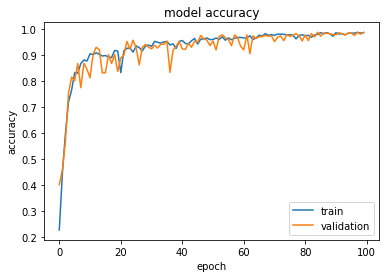

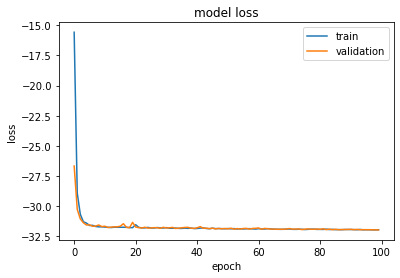

Train on 1763 samples, validate on 1763 samples
Epoch 1/100
1763/1763 [==============================] - 1s 591us/step - loss: 1.4633 - accuracy: 0.8045 - val_loss: 0.5155 - val_accuracy: 0.9346
Epoch 2/100
1763/1763 [==============================] - 1s 341us/step - loss: 0.4658 - accuracy: 0.9414 - val_loss: 0.4622 - val_accuracy: 0.9456
Epoch 3/100
1763/1763 [==============================] - 1s 344us/step - loss: 0.4193 - accuracy: 0.9457 - val_loss: 0.3772 - val_accuracy: 0.9476
Epoch 4/100
1763/1763 [==============================] - 1s 343us/step - loss: 0.4169 - accuracy: 0.9469 - val_loss: 0.3825 - val_accuracy: 0.9475
Epoch 5/100
1763/1763 [==============================] - 1s 343us/step - loss: 0.3932 - accuracy: 0.9450 - val_loss: 0.3698 - val_accuracy: 0.9452
Epoch 6/100
1763/1763 [==============================] - 1s 342us/step - loss: 0.3845 - accuracy: 0.9473 - val_loss: 0.3625 - val_accuracy: 0.9471
Epoch 7/100
1763/1763 [==============================] - 1s 343us/step

1763/1763 [==============================] - 1s 342us/step - loss: 0.1768 - accuracy: 0.9482 - val_loss: 0.1856 - val_accuracy: 0.9514
Epoch 57/100
1763/1763 [==============================] - 1s 355us/step - loss: 0.1799 - accuracy: 0.9457 - val_loss: 0.1682 - val_accuracy: 0.9509
Epoch 58/100
1763/1763 [==============================] - 1s 349us/step - loss: 0.1787 - accuracy: 0.9455 - val_loss: 0.1754 - val_accuracy: 0.9534
Epoch 59/100
1763/1763 [==============================] - 1s 345us/step - loss: 0.1830 - accuracy: 0.9484 - val_loss: 0.1767 - val_accuracy: 0.9441
Epoch 60/100
1763/1763 [==============================] - 1s 353us/step - loss: 0.1893 - accuracy: 0.9447 - val_loss: 0.2840 - val_accuracy: 0.9482
Epoch 61/100
1763/1763 [==============================] - 1s 341us/step - loss: 0.1883 - accuracy: 0.9442 - val_loss: 0.1822 - val_accuracy: 0.9500
Epoch 62/100
1763/1763 [==============================] - 1s 343us/step - loss: 0.1839 - accuracy: 0.9479 - val_loss: 0.1720 

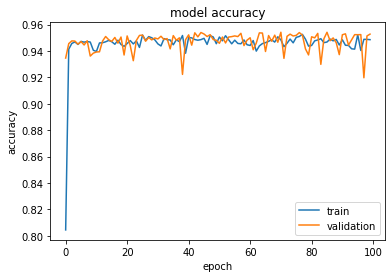

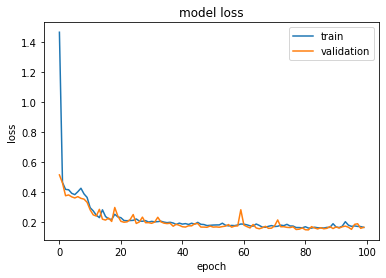

In [13]:
comb_lstm.fit(test_set, test_set,verbose=1)

In [ ]:
import keras.backend as K

K.log([0.0, 0.0]) * K.constant([0.0, 0.0])

In [ ]:
comb_lstm.save('test')

In [ ]:
# Load the model
models_on_disk = glob.glob('./model/*.h5')
models_on_disk.sort()
print('Found %d model files: %s' % (len(models_on_disk), models_on_disk))

In [ ]:
comb_lstm.load('./model/LSTM_h100_b1.000_fold0')

In [14]:
goal_pred, traj_pred = comb_lstm.predict(test_set)

In [15]:
# for i in range(len(traj_idx) - 1)

# Plot the result
goal_ind = np.arange(33)
bar_width = 0.35
# Recover the goal coordinates
test_goals_coords = test_set['goal_position'].reshape((test_set['goal_position'].shape[0], 32, 3))
test_hist_traj    = test_set['history_traj_data']
test_future_traj  = test_set['future_traj_data']
test_one_hot_goal = test_set['one_hot_goal']

for k in range(2):
    
    print("Start processing trajectory # %03d ....." % k)
    start_idx = traj_idx[k]
    end_idx   = traj_idx[k+1]
    directory = './figures/%03d' % k
    if not os.path.exists(directory):
        os.mkdir(directory)

    for i in range(start_idx, end_idx):

        fig = plt.figure(dpi=200)
        plt.subplot(211)

        vector = test_goals_coords[i][-3,:2] - test_goals_coords[i][-1,:2]
        th = np.arctan2(vector[1], vector[0])
        R = np.array([[ np.cos(th), np.sin(th)], \
                      [-np.sin(th), np.cos(th)]])

        # Plot the vehicle trajectory in the snippet
        test_hist_traj_rot = test_hist_traj[i][:,:2] @ R.T
        test_future_traj_rot = test_future_traj[i][:,:2] @ R.T
        traj_pred_rot      = traj_pred[i][:, :2] @ R.T
        plt.plot(test_hist_traj_rot[:,0], test_hist_traj_rot[:,1], 'k')
        plt.plot(test_future_traj_rot[:,0], test_future_traj_rot[:,1], 'r')
        plt.plot(traj_pred_rot[:,0], traj_pred_rot[:,1], 'b.', markersize = 3)

        # Plot the occupancy in the snippet
        test_goals_coords_rot = test_goals_coords[i][:,:2] @ R.T
        for goal, occup in zip(test_goals_coords_rot, test_goals_coords[i]):
            if occup[2] > 0:
                plt.plot(goal[0], goal[1], 'ko', fillstyle='none', markersize = 9)
            else:
                plt.plot(goal[0], goal[1], 'ko', markersize = 9)

        # Get the ground truth intention
        gt_idx = np.argmax(test_one_hot_goal[i])
        # Predictions above a threshold
        thres = 1e-2
        
        best_k_idx = [k for k, p in enumerate(goal_pred[i]) if p >= thres]
        print(np.max(goal_pred[i]))
        if gt_idx == 32: # If it is "-1" -> undetermined 
            plt.plot(0, 0, 'v', fillstyle='bottom', color = '#1f77b4', markersize = 9)
        else:
            plt.plot(test_goals_coords_rot[gt_idx][0], test_goals_coords_rot[gt_idx][1], 'o', fillstyle='bottom', color = '#1f77b4', markersize = 9)

        for j in best_k_idx:
            if j == 32:
                plt.plot(0, 0, 'v', fillstyle='none', color = '#ff770e', markersize = 9)
            else:
                plt.plot(test_goals_coords_rot[j][0], test_goals_coords_rot[j][1], 'o', fillstyle='none', color = '#ff770e', markersize = 9)

        plt.title('Dataset Entry %d' % i)
    #     plt.axis('equal')

        plt.subplot(212)
        p1 = plt.bar(goal_ind - bar_width/2, test_one_hot_goal[i], bar_width, label='GT')
        p2 = plt.bar(goal_ind + bar_width/2, goal_pred[i], bar_width, label='Pred')
        plt.xlabel('Goal Index')
        plt.ylabel('Probability')
        plt.title('Likelihood from Dataset Entry %d' % i)
        plt.legend()
        plt.tight_layout()
        
        fig.savefig('./figures/%03d/frame_%03d.png' % (k, i-start_idx))
        plt.close(fig)
        
    fps = 2
    mv = os.system("ffmpeg -r {0:d} -i ./figures/{1:03d}/frame_%03d.png -vcodec mpeg4 -y ./figures/{1:03d}_movie.mp4".format(fps, k) )
    if mv == 0:
        print("Trajectory # %03d movie saved successfully." % k)
    else:
        print("Meet problem saving Trajectory # %03d movie." % k)

Start processing trajectory # 000 .....
0.080869384
0.077032134
0.069669314
0.06296738
0.056001432
0.053825617
0.06108163
0.062114324
0.05545932
0.05967237
0.06643631
0.079213805
0.08313383
0.081482925
0.08391161
0.08939431
0.086592406
0.088010214
0.08801904
0.08802173
0.08802438
0.088024326
0.08802448
0.08794536
0.087726064
0.08726232
0.087204486
0.08721029
0.087296866
0.088230185
0.09000732
0.09196711
0.094181895
0.09657729
0.09763484
0.09659814
0.093544506
0.09289819
0.09475691
0.09476171
0.09467524
0.09428754
0.09403728
0.09429715
Trajectory # 000 movie saved successfully.
Start processing trajectory # 001 .....
0.1022699
0.1023682
0.10265387
0.10319108
0.10319326
0.10319378
0.10319382
0.103197545
0.10313563
0.10233612
0.100672945
0.08729936
0.0746084
0.063896194
0.062413573
0.060506266
0.06215656
0.053373773
0.051893298
0.05487075
0.05943096
0.06021216
0.060332365
0.066572495
0.070690855
0.06857787
0.07900941
0.083839096
0.08016544
0.084135056
0.09767363
0.083676524
Trajectory # 0